In [29]:
#importing data
import pandas as pd
A=pd.read_csv("/home/sam/ds/Titanic/train.csv")

In [30]:
A.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# imputers help us deal with missing values.



# note Imputer seems to work only on continous variables.
# for catagorical variable we use ColumnDF = ColumnDF.fillna(ColumnDF.mode().iloc[0,0])
# ColumnDF usually x[["ColumnName"]]

A.info()

print("\ncurrent number of nulls :")
print(A.isnull().sum().sum())
print()

from sklearn.preprocessing import Imputer

#imputer = Imputer(missing_values = 'Nan', strategy = 'mean', axis=0)
#missing value columns : AirBags, Rear.seat.room,  Luggage.room
import numpy as np
# "mean" as strategy used for continous numbers

imputer = Imputer(missing_values = np.nan, strategy = 'mean', axis =0)

# "most_frequent" as a strategy used for catagorical variables
imputerCat = Imputer(missing_values = np.nan, strategy = 'most_frequent', axis =0)

cat = []
con = []
for i in A.columns:
    if(A[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)
        
print("continous \n \n")
        
for i in con:
    
    
    num = int(A[[i]].isnull().sum())
    if(num>0):
        imputer = imputer.fit(A[[i]])
        A[[i]] = imputer.transform(A[[i]])
        
    else:
        pass
    
A.info()
print("\ncurrent number of nulls :")
print(A.isnull().sum().sum())
print()

print("catagorical \n \n")

for i in cat:
    
    
    num = int(A[[i]].isnull().sum())
    if(num>0):
        s = A[[i]].mode().iloc[0,0]
        A[[i]] = A[[i]].fillna(s)
        
        
    else:
        pass



# for catagorical missing values

A.info()   
print("\ncurrent number of nulls :")
print(A.isnull().sum().sum())
print()
# “most_frequent"    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

current number of nulls :
866

continous 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non

/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
A.columns
A.Survived.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
Y1 = A[["Survived"]].astype(str)
# labels=["Unnamed: 0","Width","Model","Manufacturer","MPG.city","Rev.per.mile","Luggage.room","Turn.circle","Rear.seat.room","Passengers"]
labels=["Survived"]
X1 = A.drop(labels,axis=1)



In [34]:

for i in cat:
    if (i in labels) :#This is what we are predicting/avoiding thus hardcode
        pass
    else:
        n = X1[[i]].nunique()[0] # inconsequencial hardcoded value
        print("unique values for "+i+" : "+str(n))
        if  (n<4):
            rtd = pd.get_dummies(X1[[i]])
            #print("type : "+str(type(rtd)))
            #print(rtd.head())
            
            X1=X1.join(rtd)
            X1=X1.drop(labels=[i],axis=1)
            
            #one hot encoding
            
            pass
        else:
            from sklearn import preprocessing 
  
            le = preprocessing.LabelEncoder() 
      
            X1[[i]]= le.fit_transform(X1[[i]]) 
  
           
            #label encoding
            
            pass
        #print(str(i) + " : "+ str(n))
    
print(X1.head(5))

unique values for Name : 891
unique values for Sex : 2
unique values for Ticket : 681
unique values for Cabin : 147
unique values for Embarked : 3
   PassengerId  Pclass  Name   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0            1       3   108  22.0      1      0     523   7.2500     47   
1            2       1   190  38.0      1      0     596  71.2833     81   
2            3       3   353  26.0      0      0     669   7.9250     47   
3            4       1   272  35.0      1      0      49  53.1000     55   
4            5       3    15  35.0      0      0     472   8.0500     47   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0           0         1           0           0           1  
1           1         0           1           0           0  
2           1         0           0           0           1  
3           1         0           0           0           1  
4           0         1           0           0           1  


/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


TypeError: unsupported operand type(s) for /: 'str' and 'int'

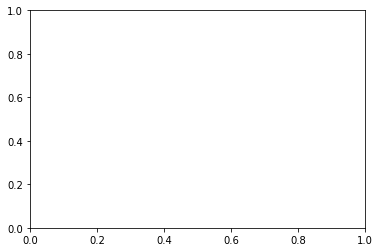

In [35]:
print(X1.columns)

# X1 = X1.drop(labels=["Foundation","LotConfig", "ExterCond", "Foundation", "BsmtFinType2", "BsmtFinSF2", "Heating", "HeatingQC", "Electrical"
#                      , "BsmtHalfBath","HalfBath", "GarageArea" , "GarageQual", "OpenPorchSF", 
#                      "Fence", "MoSold", "PoolQC_Ex"],axis=1)
from sklearn.model_selection import train_test_split
# X1 = X1.drop(labels=["Origin"],axis = 1)
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=0.2,random_state=30)

import seaborn as sb
sb.distplot(Y1)
sb.distplot(ytrain)


from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
est = OLS(ytrain,xconst)
est2 = est.fit()
print(est2.summary())
# LotConfig, ExterCond, Foundation, BsmtFinType2, BsmtFinSF2, Heating, HeatingQC, Electrical, BsmtHalfBath
# HalfBath, GarageArea , GarageQual, OpenPorchSF, Fence, MoSold, PoolQC_Ex

In [37]:
# using decision tree
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=20)
model = dtr.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, accuracy_score
R2=r2_score(ytest,pred)

p = xtrain.columns.nunique()
n = xtrain.size

Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
# print("r2_score  :"+str(R2))
# print("adjusted r2_score  :"+str(Adj_r2))

print(accuracy_score(ytest,pred))

r2_score  :-0.0037819509650496297
adjusted r2_score  :-0.0051938817711896235
0.7597765363128491


In [43]:
# now we will test out the random forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40,min_samples_split=7)
model = model.fit(xtrain,ytrain)
pred = model.predict(xtest)
# R2=r2_score(ytest,pred)

# p = xtrain.columns.nunique()
# n = xtrain.size

# Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
# print("r2_score  :"+str(R2))
# print("adjusted r2_score  :"+str(Adj_r2))
from sklearn.metrics import mean_squared_log_error, accuracy_score, confusion_matrix, classification_report
# v = mean_squared_log_error(ytest, pred)
# import math as mt
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))


0.8379888268156425
[[98 10]
 [19 52]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       108
           1       0.84      0.73      0.78        71

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


# USING THE TEST FILE

In [46]:
A=pd.read_csv("/home/sam/ds/Titanic/test.csv")
# imputers help us deal with missing values.



# note Imputer seems to work only on continous variables.
# for catagorical variable we use ColumnDF = ColumnDF.fillna(ColumnDF.mode().iloc[0,0])
# ColumnDF usually x[["ColumnName"]]

A.info()

print("\ncurrent number of nulls :")
print(A.isnull().sum().sum())
print()

from sklearn.preprocessing import Imputer

#imputer = Imputer(missing_values = 'Nan', strategy = 'mean', axis=0)
#missing value columns : AirBags, Rear.seat.room,  Luggage.room
import numpy as np
# "mean" as strategy used for continous numbers

imputer = Imputer(missing_values = np.nan, strategy = 'mean', axis =0)

# "most_frequent" as a strategy used for catagorical variables
imputerCat = Imputer(missing_values = np.nan, strategy = 'most_frequent', axis =0)

cat = []
con = []
for i in A.columns:
    if(A[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)
        
print("continous \n \n")
        
for i in con:
    
    
    num = int(A[[i]].isnull().sum())
    if(num>0):
        imputer = imputer.fit(A[[i]])
        A[[i]] = imputer.transform(A[[i]])
        
    else:
        pass
    
A.info()
print("\ncurrent number of nulls :")
print(A.isnull().sum().sum())
print()

print("catagorical \n \n")

for i in cat:
    
    
    num = int(A[[i]].isnull().sum())
    if(num>0):
        s = A[[i]].mode().iloc[0,0]
        A[[i]] = A[[i]].fillna(s)
        
        
    else:
        pass



# for catagorical missing values

A.info()   
print("\ncurrent number of nulls :")
print(A.isnull().sum().sum())
print()
# “most_frequent"    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB

current number of nulls :
414

continous 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non

/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [50]:
#Y1 = A[["Survived"]].astype(str)
# labels=["Unnamed: 0","Width","Model","Manufacturer","MPG.city","Rev.per.mile","Luggage.room","Turn.circle","Rear.seat.room","Passengers"]
labels=[]
X1 = A.drop(labels,axis=1)



In [52]:

for i in cat:
    if (i in labels) :#This is what we are predicting/avoiding thus hardcode
        pass
    else:
        n = X1[[i]].nunique()[0] # inconsequencial hardcoded value
        print("unique values for "+i+" : "+str(n))
        if  (n<4):
            rtd = pd.get_dummies(X1[[i]])
            #print("type : "+str(type(rtd)))
            #print(rtd.head())
            
            X1=X1.join(rtd)
            X1=X1.drop(labels=[i],axis=1)
            
            #one hot encoding
            
            pass
        else:
            from sklearn import preprocessing 
  
            le = preprocessing.LabelEncoder() 
      
            X1[[i]]= le.fit_transform(X1[[i]]) 
  
           
            #label encoding
            
            pass
        #print(str(i) + " : "+ str(n))
    
print(X1.head(5))

unique values for Name : 418
unique values for Sex : 2
unique values for Ticket : 363
unique values for Cabin : 76
unique values for Embarked : 3
   PassengerId  Pclass  Name   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0          892       3   206  34.5      0      0     152   7.8292     15   
1          893       3   403  47.0      1      0     221   7.0000     15   
2          894       2   269  62.0      0      0      73   9.6875     15   
3          895       3   408  27.0      0      0     147   8.6625     15   
4          896       3   178  22.0      1      1     138  12.2875     15   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0           0         1           0           1           0  
1           1         0           0           0           1  
2           0         1           0           1           0  
3           0         1           0           0           1  
4           1         0           0           0           1  


/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
pred = model.predict(X1)

X1['Survived'] = pred

In [62]:

A=pd.read_csv("/home/sam/ds/Titanic/gender_submission.csv")
A.head()
A = A.drop("Survived",axis=1)
A['Survived'] = pred

A.to_csv('submissionT.csv',index=False)

<BarContainer object of 14 artists>

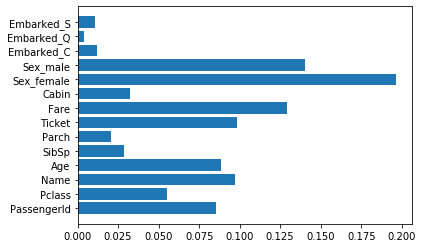

In [44]:
import matplotlib.pyplot as plt
plt.barh(X1.columns, model.feature_importances_)

In [ ]:
#For submiting here